## Observations and Insights 

- A total of 249 mice were observed for the study on the effectiveness of different drugs on tumor size, with roughly equal types male and female. 
- according to this study, Keptipril had the worse results on slowing tumor volume, while Ramicane had the best results. 
- From this study 4 drugs proven to be the most effective (Ramicane Capomulin  Infubinol  and Ceftamin). From them Ramicane and Capomulin were the best prefomring with lower final tumor volumes. Ramicane had slightly lower final tumor numbers overall. 
- When considering Capomulin Time vs. Tumor volume, it is noted that there is an overall trend of lessening of tumor volume over time. It is also noted the the range of tumor volumes inceases, suggesting differnt mice respond differntly to the drug ( as would be expected), but overall a decreasing trend is noted. 
- When comparing the weight of mice given the Capomulin vs their tumor volume there is a strong positive correction of 0.84, suggesting that larger mice have larger tumor volumes. 
-A single outlier was observed when comparing the four best perfomring drugs. It was from a mouse given the Infubinol. Infubinol has a lower bound of  36.83 and the mouse recorded a result 36.32. This measurement isn't too far outside the lower bound, and not an unrealistic tumor size ( see measurements from other drugs) it is assumed this measurement is true and would be included in the study. 

Some considerations and limitations:
- 25 mice were assigned for each drug, which is a small sample size and should be considered during analysis. 
- Final tumor time was unclear. Measurements were taken at timepoints. Some mice made it to the final timepoint of 45 however many did not. The last time point the mouse's tumor was measured was considered its final timepoint for calculations. This could have a large effect on final tumor volumes. 
- Some mice had metastatic sites, meaning a second tumor in a differnt location to the primary and this could have an impact on the effectiveness of the drug.
- The mice had a range of ages. Age of mice may be impactful on drug effectiveness. 

In [2]:
#%matplotlib widget

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [4]:
# Combine the data into a single dataset
mouse_study_merge=pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_study_merge.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [5]:
# Checking the number of mice.
mouse_study_merge["Mouse ID"].nunique()

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Mouse_Data=mouse_study_merge.groupby(["Mouse ID", "Timepoint"])
mouse_study_merge.loc[mouse_study_merge["Mouse ID"] == "k403", :]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [7]:
mouse_study_merge.loc[mouse_study_merge["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_dubs =mouse_study_merge.loc[mouse_study_merge.duplicated(['Mouse ID', 'Timepoint'])]
mouse_dubs
#mouse_dubs = mouse_study_merge.duplicated(['Mouse ID', 'Timepoint'])

#mouse_dubs.value_counts()
#mouse_dubs=pd.DataFrame(mouse_dubs)
#mouse_dubs[mouse_dubs[0]]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df=mouse_study_merge.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False, inplace=False)
clean_mouse_df["Mouse ID"].count()


#DataFrame.drop_duplicates(subset=None, keep=’first’, inplace=False)
#data.sort_values("First Name", inplace = True) 
  
# dropping ALL duplicte values 



1883

In [10]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_df["Mouse ID"].nunique()

249

In [11]:
clean_mouse_df.columns


Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_group=clean_mouse_df.groupby("Drug Regimen")

drugs_mean =clean_mouse_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").mean()
drugs_median =clean_mouse_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").median()
drugs_var=clean_mouse_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").var()
drugs_std=clean_mouse_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").std()
drugs_SEM=clean_mouse_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").sem()



# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_tumorVol= pd.merge(drugs_mean, drugs_median, on="Drug Regimen")
drug_tumorVol= drug_tumorVol.rename(columns={"Tumor Volume (mm3)_x": "Tumor Volume (mean)", "Tumor Volume (mm3)_y": "Tumor Volume (median)"})
drug_tumorVol=pd.merge(drug_tumorVol, drugs_var, on="Drug Regimen")
drug_tumorVol=pd.merge(drug_tumorVol, drugs_std, on="Drug Regimen")
drug_tumorVol=pd.merge(drug_tumorVol, drugs_SEM, on="Drug Regimen")
drug_tumorVol=drug_tumorVol.rename(columns={"Tumor Volume (mean)": "Tumor Volume (mean)", 
                                            "Tumor Volume (median)": "Tumor Volume (median)",
                                            "Tumor Volume (mm3)_x": "Tumor Volume (var)",
                                            "Tumor Volume (mm3)_y": "Tumor Volume (std)",
                                            "Tumor Volume (mm3)": "Tumor Volume (SEM)"})
drug_tumorVol

,Tumor Volume (mean),Tumor Volume (median),Tumor Volume (var),Tumor Volume (std),Tumor Volume (SEM)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group=clean_mouse_df.groupby("Drug Regimen")
drug_group["Tumor Volume (mm3)"].describe()

# This method produces everything in a single groupby function


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,151.0,52.458254,6.637293,45.000000,47.011050,50.854632,56.528101,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

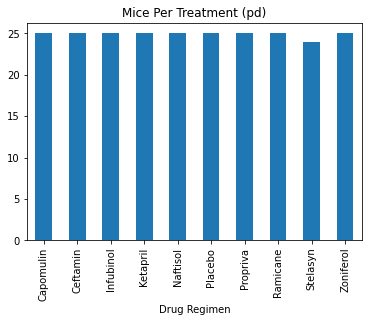

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drugs= drug_group["Drug Regimen"].unique()
mouse_count = drug_group["Mouse ID"].nunique()

mouse_count_chart=mouse_count.plot(kind="bar", title="Mice Per Treatment (pd)")
mouse_count_chart.set_ylabel=('Number of mice')
#export chart 
plt.savefig("Images/Mice_per_treatment(pd).png")

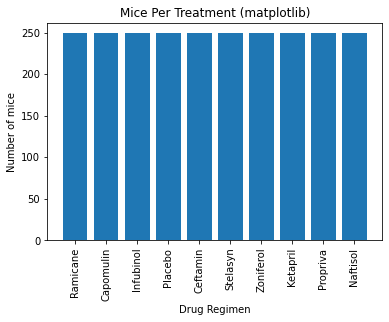

In [23]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drugs_2= clean_mouse_df["Drug Regimen"].unique()
mouse_count_2 = clean_mouse_df["Mouse ID"].nunique()
plt.bar(drugs_2, mouse_count_2)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")
plt.title("Mice Per Treatment (matplotlib)")
plt.xticks(rotation=90)

#export chart 
plt.savefig("Images/Mice_per_treatment(matplotlib).png")

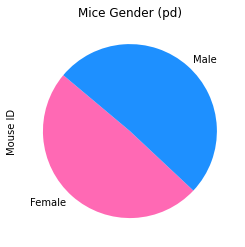

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex= clean_mouse_df.groupby("Sex")
sex_count= mice_sex["Mouse ID"].count()
colour=["hotpink", "dodgerblue"]
gender_pie=sex_count.plot(kind="pie", title="Mice Gender (pd)", colors=colour, startangle=140);
gender_pie.set_ylabel=("")
#export chart 
plt.savefig("Images/Gender_pie(pd).png")

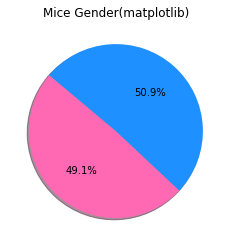

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


plt.pie(sex_count,autopct="%1.1f%%", shadow=True,startangle=140, colors=colour);
plt.title("Mice Gender(matplotlib)")

#export chart 
plt.savefig("Images/Gender_pie(matplotlib).png")

## Quartiles, Outliers and Boxplots

In [27]:
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# to be removed: "Placebo","Stelasyn","Zoniferol","Ketapril", "Propriva", "Naftisol" 
clean_mouse_df= clean_mouse_df.sort_values("Timepoint", ascending=True)
Drug_Volume_df=clean_mouse_df.drop_duplicates("Mouse ID", keep="last")
Drug_Volume_df = Drug_Volume_df.loc[Drug_Volume_df["Drug Regimen"] != "Placebo"]
Drug_Volume_df = Drug_Volume_df.loc[Drug_Volume_df["Drug Regimen"] != "Stelasyn"]
Drug_Volume_df = Drug_Volume_df.loc[Drug_Volume_df["Drug Regimen"] != "Zoniferol"]
Drug_Volume_df = Drug_Volume_df.loc[Drug_Volume_df["Drug Regimen"] != "Ketapril"]
Drug_Volume_df = Drug_Volume_df.loc[Drug_Volume_df["Drug Regimen"] != "Propriva"]
Drug_Volume_df = Drug_Volume_df.loc[Drug_Volume_df["Drug Regimen"] != "Naftisol"]

Drug_Volume_df["Drug Regimen"].value_counts()
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Ramicane     25
Capomulin    25
Infubinol    25
Ceftamin     25
Name: Drug Regimen, dtype: int64

In [29]:
# Put treatments into a list for for loop (and later for plot labels)
drugs=["Ramicane", "Capomulin", "Ceftamin", "Infubinol"]


# Create empty list to fill with tumor vol data (for plotting)
Tum_Vol_list=[]
# IQR=[]
# UpperQ=[]
# LowerQ=[]
outliers=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol=Drug_Volume_df.loc[Drug_Volume_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
        
    # add subset 
    Tum_Vol_list.append(tumor_vol)
    quartiles=tumor_vol.quantile([0.25, 0.5, 0.75 ])  
    UpperQ=quartiles[0.75]
    LowerQ=quartiles[0.25]
    IQR=UpperQ-LowerQ
    lower_bound= LowerQ - (1.5*IQR)
    upper_bound= UpperQ + (1.5*IQR)
    
    outlier= tumor_vol.loc[tumor_vol< lower_bound]
    outlier.append(outlier)
 
       
    
    # Determine outliers using upper and lower bounds
    
    print("--------------------------")
    print(f"Treatment Type: {drug}")
    print("--------------------------")
    print(f"The lower quartile of tumor volume is: {LowerQ}")
    print(f"The upper quartile of tumor volume is: {UpperQ}")
    print(f"The interquartile range of tumor volume is: {IQR}")
    print(f"The the median of tumor volume is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} could be outliers for tumor volume.")
    print(f"Values above {upper_bound} could be outliers for tumor volume.") 
    print(f"The outliers for this drug are: {outlier}")
    


--------------------------
Treatment Type: Ramicane
--------------------------
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers for tumor volume.
Values above 54.30681135 could be outliers for tumor volume.
The outliers for this drug are: Series([], Name: Tumor Volume (mm3), dtype: float64)
--------------------------
Treatment Type: Capomulin
--------------------------
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers for tumor volume.
Values above 51.83201549 could be outliers for tumor volume.
The outliers for this drug are: Series([], Name: Tumor Volume (mm3), 

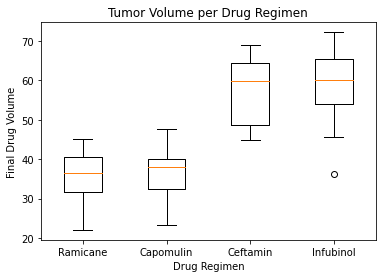

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(Tum_Vol_list, labels=drugs);
plt.title("Tumor Volume per Drug Regimen")
plt.ylabel("Final Drug Volume")
plt.xlabel("Drug Regimen")

# #export chart 
plt.savefig("Images/BandW_Tum_vol_per_drug.png")

## Line and Scatter Plots

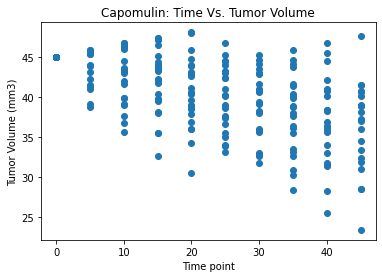

In [31]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
clean_mouse_df
Capomulin= clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin"]
CapomulinTV= Capomulin[["Timepoint", "Tumor Volume (mm3)"]]
timepoint=CapomulinTV["Timepoint"]
Cap_Tum_vol=CapomulinTV["Tumor Volume (mm3)"]
plt.scatter(timepoint, Cap_Tum_vol)
plt.xlabel("Time point")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin: Time Vs. Tumor Volume")


# #export chart 
plt.savefig("Images/Scatter_Time_vs_tumor_vol.png")


The Correlation Coefficient is 0.84.
The Line regression is: y = 0.95x + 21.55.


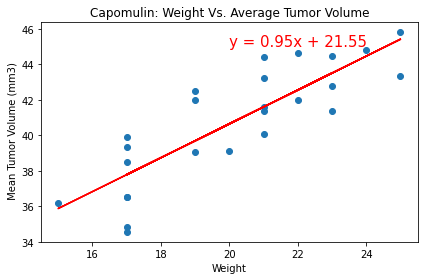

In [32]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

CapomulinWT= Capomulin[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
Cap_weight=CapomulinWT.groupby(["Mouse ID"]).mean()["Weight (g)"]
Cap_tum_vol_ave=CapomulinWT.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]
plt.scatter(Cap_weight, Cap_tum_vol_ave)
plt.xlabel("Weight")
plt.ylabel(" Mean Tumor Volume (mm3)")
plt.title("Capomulin: Weight Vs. Average Tumor Volume")

#coefficient calc
cor_coef=(round(st.pearsonr(Cap_weight, Cap_tum_vol_ave)[0],2))
print(f"The Correlation Coefficient is {cor_coef}.")

#line regression calcs
(slope, intercept, rvalue, pvalue, stderr) = linregress(Cap_weight, Cap_tum_vol_ave)
regress_values = Cap_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The Line regression is: {line_eq}.")

#tidying plot 
plt.plot(Cap_weight,regress_values,"r-")
plt.annotate(line_eq,(20,45),fontsize=15,color="red")
plt.tight_layout()

#export plot
plt.savefig("Images/Capomulin_Weight_vs_Avg_Tumor_Volume.png")

## Correlation and Regression

In [35]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen 
print(f"The Correlation Coefficient is {cor_coef}.")
print(f"The Line regression is: {line_eq}.")




The Correlation Coefficient is 0.84.
The Line regression is: y = 0.95x + 21.55.
